<a href="https://colab.research.google.com/github/papun-analytic/Handling-null-value-for-data-sciences/blob/main/Category_Mapping_documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GUIDLINE TO RUN CATEGORY-MAPPING SCRIPTS** https://colab.research.google.com/drive/1ySAqbQM6DR-SqxK_DHKIlwzyzsrFSR65#scrollTo=SuIkuqyoaLVB


1.   UPLOAD THE SENTIMENT DEDUP FILE BY CLICKING ON THE UPLOAD FILE SIGN OF COLAB .HERE IS THE IMAGE OF THE ICON WHICH NEED TO BE CLICKED INORDER TO UPLOAD THE FILE---->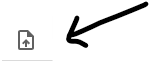

3. NAME OF THE SENTIMENT DEDUP FILE SHOULD BE  IN SMALL CASE "sentiment.csv"

4. STEP TO PREPARE THE KEYWORD FILE.THE KEYWORD FILE HAVE TWO COLUMN.

5. FIRST COLUMN HEADER IS "Categories" IT WILL HAVE THE LIST OF ALL THOSE UNIQUE CATEGORY NAME WHICH NEED TO BE FORMED.HERE IS LIVE EXAMPLE


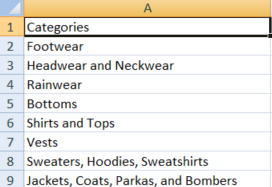

3.THE SECOND COLUMN HEADER IS "KEYWORD".IT WILL HAVE THE  LIST OF ALL THOSE KEYWORD OF THAT RESPECTIVE  CATEGORY WHICH CAN USED TO IDENTIFY EACH CATEGORY.BASICALLY IT IS THE BAG OF WORD OF EACH CATEGORY.THE KEYWORDS SHOULD BE UNIQUE TO EACH CATEGORY .IF SKU  NAME CONTAINS THESE MENTION KEYWORD THEN IT WILL GET MAPPED TO CORRESPOND KEYWORD.HERE IS THE LIVE EXAMPLE FOR YOUR REFERENCES.

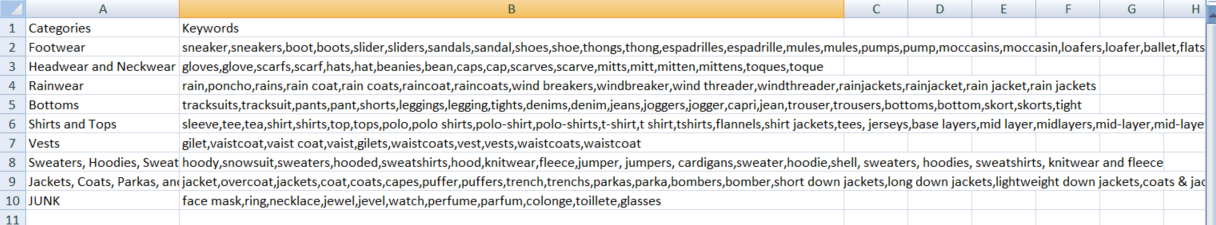


UPLOAD THE KEYWORD  FILE BY CLICKING ON THE UPLOAD FILE SIGN OF COLAB .
THE NAME OF THE KEYWORD FILE IS IN SMALL CASE "keyword.csv" HERE IS THE IMAGE OF THE ICON WHICH NEED TO BE CLICKED INORDER TO UPLOAD THE FILE---->

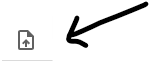


7. CLICK ON THE EXECUTOR BUTTON  OR ENTER CTRL+ENTER TO RUN THE  CODE

HERE IS THE LIVE EXAMPLE FOR REFERNCES

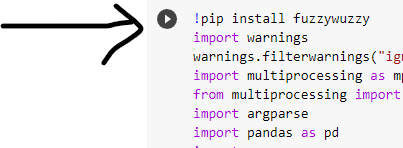

8. AFTER RUNNING THE SCRIPTS IT WILL ASK TO PRESSS 1 TO CONTINUE WITH

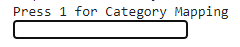

9. THEN YOU NEED TO GIVE THE PATH AND NAME OF THE SENTIMENT DEDUP FILE AS MENTION BELOW

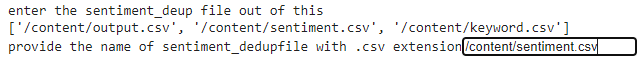

10. AFTER THAT IT WILL ASK YOU TO GIVE THE FILES NAME ALONG WITH KEYWORD FILE PATH AS MENTION BELOW

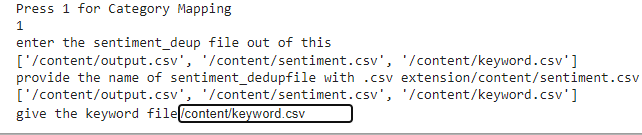

*** AFTER THE SUCESFULL RUN THE CATEGORY MAPPING OUTPUT FILE WILL AUTOMATICALLY GET DOWNLOADED TO LOCAL SYSTEM***

*** OR IT CAN BE DOWNLOADED BY MANUALLY MENTION BELOW ****

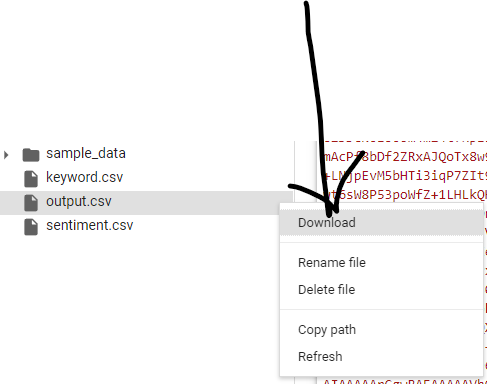




In [6]:
!pip install fuzzywuzzy
import warnings
warnings.filterwarnings("ignore")
import multiprocessing as mp
from multiprocessing import Process
import argparse
import pandas as pd
import re
from collections import Counter
import os
import unicodedata
import numpy as np
import itertools
from itertools import combinations
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import glob
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
def clean_text(df):
    all_reviews =[]
    lines = df["SKU"].values.tolist()
    for text in lines:
        text = text.lower()

        text = text.replace("\\n", "")
        text = text.replace("'s","")
        text = text.replace("(", "")
        text = text.replace(")", "")
        text = text.replace("\d", "")
        text = text.replace(",", "")
        text = text.replace("\n", "")
        text = text.replace(".", "")
        # Removing Website Links
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)

        # Removing emoji's
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        text = re.sub(r"'s", "", text)

        # Remove Special Characters
        text = re.sub(r"[\"!@#$%^&*(){}?/;`~<>+=]-", "", text)

        # Remove accented characters
        text = remove_accented_chars(text)
        text=text.split(" ")

        all_reviews.append(text)

    return all_reviews      
def category_mapping(data,keyword):
    data["Category"]=""
    data["Mapped keyword"]="NA"
    for i1,row1 in enumerate(keyword["Keywords"]):
        for word1 in row1.split(","):
            for i2,row2 in enumerate(data["keyword"]):
                    if word1 in row2:
                        data.iloc[i2,2]=keyword.iloc[i1,0]
                        data.iloc[i2,3]=word1
    data["Category"].fillna("NA",inplace=True)
    return data
if __name__ == '__main__':
    print("Press 1 for Category Mapping")
    s=input()
    if s==str(1):
        path=os.getcwd()
        files = glob.glob(path + "/*.csv")
        print("enter the sentiment_deup file out of this")
        print(files)
        d=input("provide the name of sentiment_dedupfile with .csv extension")

        data=pd.read_csv(d)
        print(files)
        k=input("give the keyword file")
        keyword=pd.read_csv(k)
        l=clean_text(data)
        data["keyword"]=l
        d=data
        k=keyword
        output=category_mapping(d,k)
        print("Category Mapping Sucessfull")
        print("Here is the frequency distribution of each category that been mapped to each sku")
        print("--------------------------------------")
        print(data["Category"].value_counts())
        print("--------------------------------")
        from google.colab import files
        output.to_csv('output.csv', encoding= 'utf-8-sig') 
        print("file downloading started")
        files.download('output.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Press 1 for Category Mapping
1
enter the sentiment_deup file out of this
['/content/output.csv', '/content/sentiment.csv', '/content/keyword.csv']
provide the name of sentiment_dedupfile with .csv extension/content/sentiment.csv
['/content/output.csv', '/content/sentiment.csv', '/content/keyword.csv']
give the keyword file/content/keyword.csv
Category Mapping Sucessfull
Here is the frequency distribution of each category that been mapped to each sku
--------------------------------------
Jackets, Coats, Parkas, and Bombers    445
                                       201
Footwear                               132
Shirts and Tops                        120
JUNK                                    83
Sweaters, Hoodies, Sweatshirts          74
Bottoms                                 43
Headwear and Neckwear                   38
Vests                                   24
Rainwear             

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>